<a href="https://colab.research.google.com/github/PrudhviGowroju/Play-Store-App-Review-Analysis/blob/main/Copy_of_Almabetter_Kundan_Lal_(Coh_Hardeol)%2CPankaj_Sudhir_Ganjare_%2C_Palagiri_Sushma_%2C_Abhijeet_Kulkarni_%2C_Gowroju_Prudhvi_Capstone_project_EDA_topic_Playstore_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


'''
We chose to do a data analysis on a Play store data set and a User Review as part of the same study for two reasons. First, we wanted to do data driven findings on a subject that most people can relate to as real world analysis, and second, there were a lot of numeric data parts related to this Play store dataset.
We dealt with 10840+ rows & 13 columns of data in which there were around 10840+ apps categorized under 21 categories ..,

Our goal was to discover answers to many questions using Python (Pandas) chart analysis, which may be extremely useful to every Android application development firm in understanding what the market requires and what sort of or category/genre of applications they can go for as their product.
We employed several types of diagrams in charts depending on the amount of the samples and their representation, such as a bar chart, a pie chart, a barh chart, a scatter chart, and so on.
'''



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import plotly.express as px
import seaborn as sns

In [ ]:
file_path ='/content/drive/MyDrive/Datasets/Play _Store _Data.csv'
playstoredf = pd.read_csv(file_path)
user_reviews= pd.read_csv('/content/drive/MyDrive/alma projects/Capstone Project/capstone database/Copy of Play Store Data.csv'')

SyntaxError: ignored

In [ ]:
#Finding the initial all info about all columns and its null values & Data Types in playstore csv file
playstoredf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
playstoredf.shape

(10841, 13)

In [ ]:
playstoredf.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#checking any duplicate values for the same app name in App column
boolean = playstoredf['App'].duplicated().any()
boolean

True

In [ ]:
#Below mentioned apps are having duplicate rows, let's check they have identical values or not 
playstoredf['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64

In [ ]:
'''
As we can see from the above dataframe, ESPN app is having identical rows with difference in number of reviews. 
It may have happened that for the same app, the data has been scraped in different points of time. 
So we have kept row of an app with maximum number of reviews, assuming it to be the latest one 
'''

playstoredf[playstoredf['App']=='ESPN']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2959,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3010,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3018,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3048,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3060,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3072,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
4069,ESPN,SPORTS,4.2,521081,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up


In [ ]:
# Dropping Duplicate values for Apps column of the data frame
playstoredf.drop_duplicates(['App'],inplace=True)

In [ ]:
# Data cleaning done on Installs column
playstoredf['Installs']=playstoredf['Installs'].apply(lambda x:x.replace('+',''))
playstoredf['Installs']=playstoredf['Installs'].apply(lambda x:x.replace(',',''))
playstoredf=playstoredf.drop(10472)
playstoredf['Installs']=playstoredf['Installs'].astype(dtype=int)


In [ ]:
#data cleaning done on Size column
playstoredf['Size'] = playstoredf['Size'].str.replace('M',"000")
playstoredf['Size'] = playstoredf['Size'].str.replace('k',"")
playstoredf['Size'] = playstoredf['Size'].str.replace("1,000+","1000")
playstoredf['Size'] = playstoredf['Size'].str.replace('Varies with device',"0")
playstoredf['Size'] = playstoredf['Size'].astype(dtype=float)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [ ]:
# data type conversion done on Reviews Column for study
playstoredf['Reviews'] = playstoredf['Reviews'].astype(dtype=int)

In [ ]:
playstoredf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            9659 non-null   float64
 5   Installs        9659 non-null   int64  
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.0+ MB


In [ ]:
# Applying mean function to replace all NaN values 
x= playstoredf["Rating"].mean()
playstoredf["Rating"].fillna(x , inplace = True)

In [ ]:
# To look at the information of all columns and its data types
playstoredf.info()
# As after applying mean function values were coming to 4 decimal places in Rating column so converting it to 1 decimal place
psdf = playstoredf.round(1)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            9659 non-null   float64
 5   Installs        9659 non-null   int64  
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.0+ MB


In [ ]:
"""
plt.rcParams['figure.figsize'] = (25,6)
table3.plot.bar(x= 'App' , y = 'Rating');
plt.title('Most Rated apps amongst all apps in Communication category')
plt.ylabel('Rating')
"""

"\nplt.rcParams['figure.figsize'] = (25,6)\ntable3.plot.bar(x= 'App' , y = 'Rating');\nplt.title('Most Rated apps amongst all apps in Communication category')\nplt.ylabel('Rating')\n"

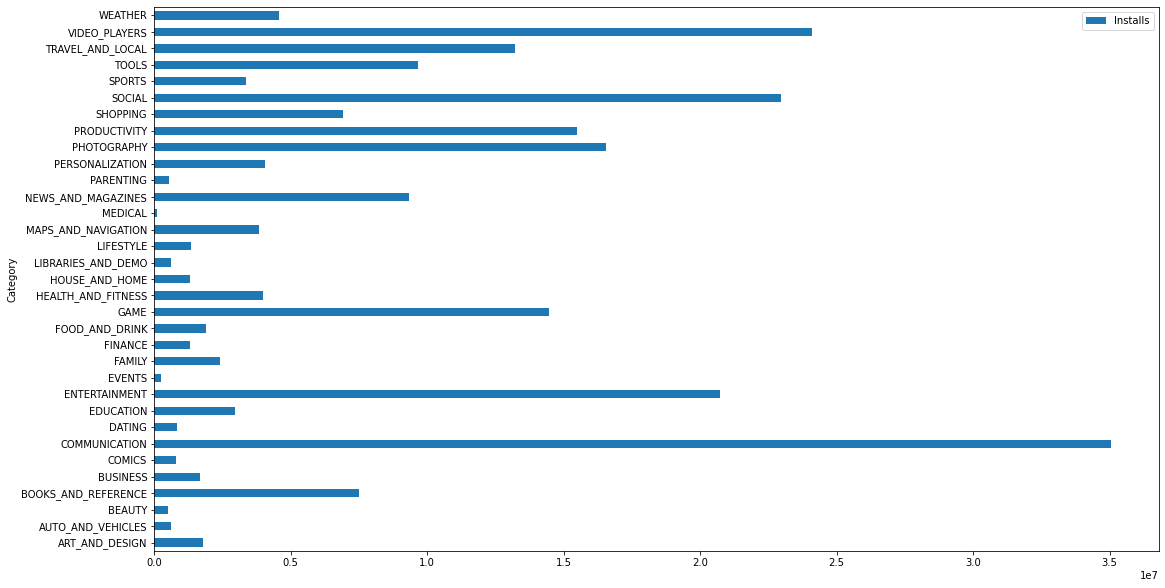

In [ ]:
# finding out Average Installs of app in each category of App, Category wise
plt.rcParams['figure.figsize']=(18,10)
psdf9 = psdf.loc[ 0: , ['Category','Installs']]
psdf10 = psdf9.groupby('Category').mean('Installs')
psdf10.plot.barh();

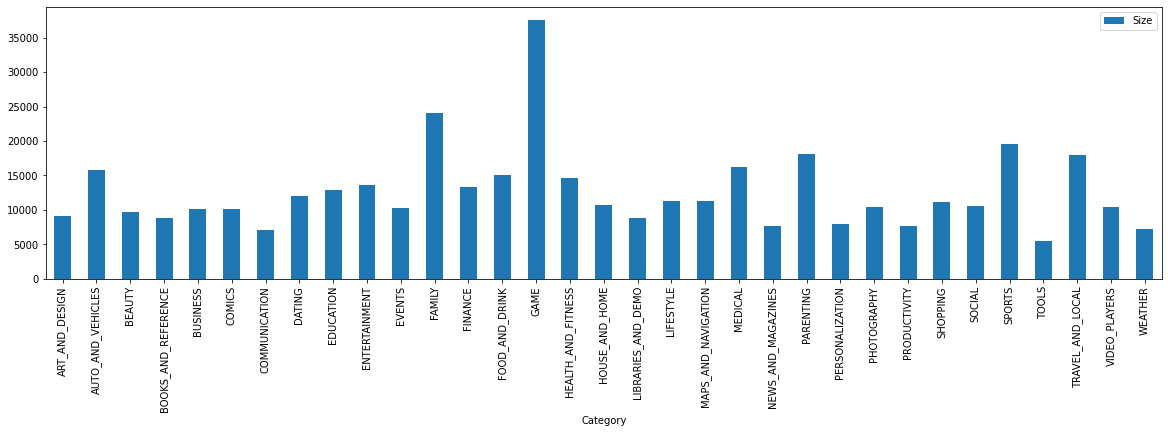

In [ ]:
# finding out Average size of app in each category of App, Category wise
plt.rcParams['figure.figsize']=(20,5)
psdf2 = psdf.loc[ 0: , ['Category','Size']]
psdf3 = psdf2.groupby('Category').mean('Size')
psdf3.plot.bar();


In [ ]:
user_reviews.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [ ]:
user_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
user_reviews.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


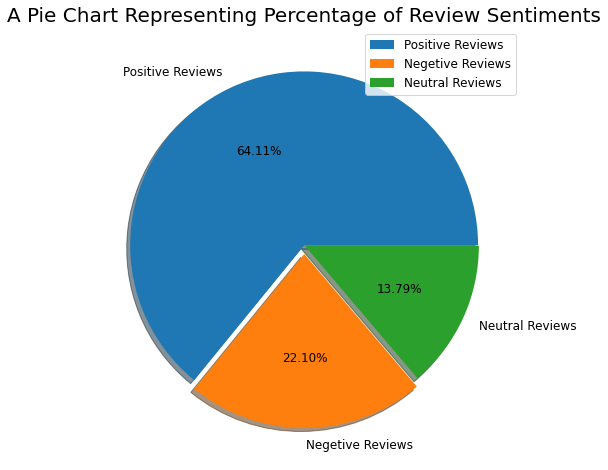

In [ ]:
#Percentage of Review Sentiments
counts = list(user_reviews['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negetive Reviews','Neutral Reviews'
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (8, 8)
plt.pie(counts, labels=labels, explode=[0, 0.05, 0.005], shadow=True, autopct="%.2f%%")
plt.title('A Pie Chart Representing Percentage of Review Sentiments', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

In [ ]:
playstoredf[playstoredf['Category']=='SOCIAL']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.100000,78158306,0.0,1000000000,Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.500000,66577313,0.0,1000000000,Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2546,Facebook Lite,SOCIAL,4.300000,8606259,0.0,500000000,Free,0,Teen,Social,"August 1, 2018",Varies with device,Varies with device
2547,"Messages, Text and Video Chat for Messenger",SOCIAL,4.400000,49173,4.0,10000000,Free,0,Everyone,Social,"June 4, 2018",1.24,4.1 and up
2548,Tumblr,SOCIAL,4.400000,2955326,0.0,100000000,Free,0,Mature 17+,Social,"August 1, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10714,FunForMobile Ringtones & Chat,SOCIAL,4.400000,68358,7.2,5000000,Free,0,Mature 17+,Social,"May 7, 2016",3.22,4.1 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.400000,622,0.0,100000,Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
10799,Fr Daoud Lamei,SOCIAL,4.700000,2036,6.8,100000,Free,0,Everyone,Social,"May 20, 2018",1.72,4.0.3 and up
10825,Naruto & Boruto FR,SOCIAL,4.173243,7,7.7,100,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up


In [ ]:
playstoredf.describe()

,Rating,Reviews,Size,Installs
count,9659.000000,9.659000e+03,9659.000000,9.659000e+03
mean,4.173243,2.165926e+05,16038.343027,7.777507e+06
std,0.494312,1.831320e+06,22606.145173,5.375828e+07
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4.000000,2.500000e+01,3.400000,1.000000e+03
50%,4.200000,9.670000e+02,266.000000,1.000000e+05
75%,4.500000,2.940100e+04,25000.000000,1.000000e+06
max,5.000000,7.815831e+07,100000.000000,1.000000e+09


In [ ]:

playstoredf[playstoredf['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
# Removing 10840 record
playstoredf=playstoredf.drop(10840)

In [ ]:
playstoredf[playstoredf['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.173243,0,0.0,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [ ]:
# considering not null values of Type column
df_type_not_null=playstoredf[~playstoredf['Type'].isnull()]
df_type_not_null

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,4.173243,0,9.6,10,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.500000,38,53000.0,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.6,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.173243,3,9.5,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up


In [ ]:
# Finding category wise free and paid apps
appcount_type=df_type_not_null.groupby(['Category','Type'])['App'].count().unstack().sort_values(by=['Free','Paid'],ascending=False).fillna(0)
appcount_type

Type,Free,Paid
Category,,
FAMILY,1648.0,183.0
GAME,877.0,82.0
TOOLS,749.0,78.0
BUSINESS,408.0,12.0
LIFESTYLE,349.0,19.0
PRODUCTIVITY,346.0,28.0
FINANCE,328.0,17.0
MEDICAL,312.0,83.0
SPORTS,301.0,24.0


Text(0.5, 1.0, 'Category wise number of Free and Paid Apps')

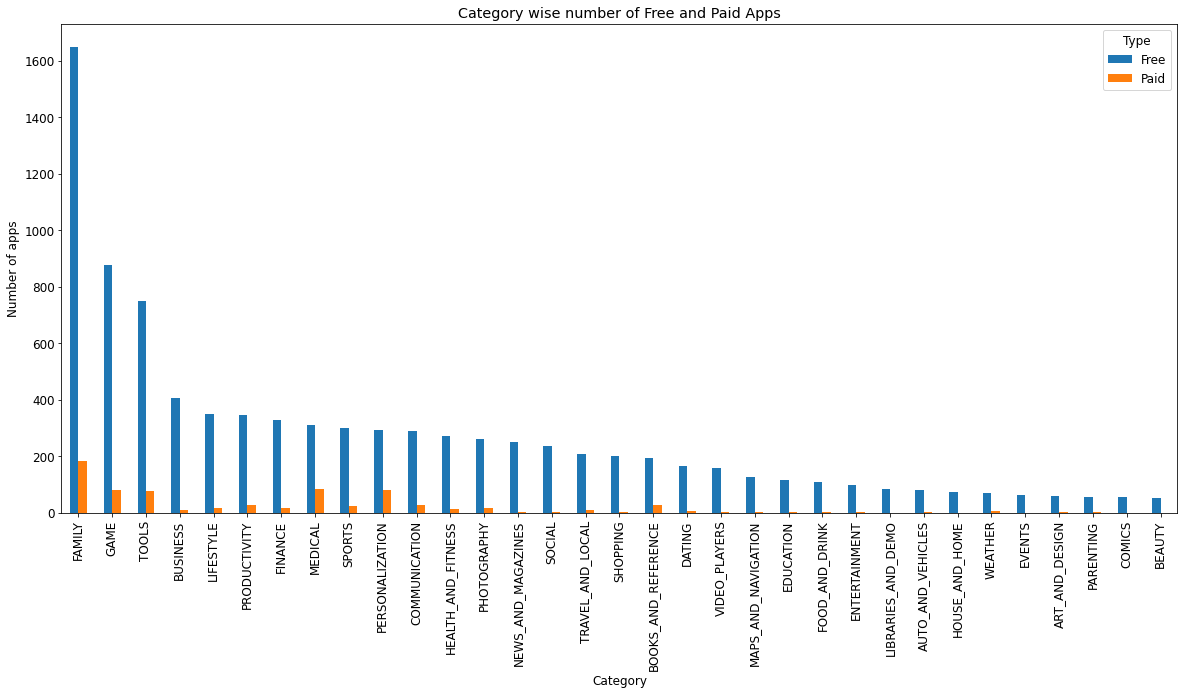

In [ ]:
# finding Category wise Number of Free and Paid Apps
plt.rcParams['figure.figsize']=(20,9)
appcount_type.plot(kind='bar')
plt.xlabel('Category',fontsize=12)
plt.ylabel('Number of apps')
plt.title('Category wise number of Free and Paid Apps')


In [ ]:
# Filtering paid apps from Type Column
paid_apps=df_type_not_null[df_type_not_null['Type']=='Paid']
paid_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.700000,11442,6.8,100000,Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.800000,10295,39000.0,100000,Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.000000,18247,0.0,100000,Paid,$3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
476,"Moco+ - Chat, Meet People",DATING,4.200000,1545,0.0,10000,Paid,$3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up
477,Calculator,DATING,2.600000,57,6.2,1000,Paid,$6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,FAMILY,4.173243,17,157.0,100,Paid,$0.99,Mature 17+,Entertainment,"November 25, 2015",1.2,2.1 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.400000,35,2.4,1000,Paid,$7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up
10782,Trine 2: Complete Story,GAME,3.800000,252,11000.0,10000,Paid,$16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up
10785,"sugar, sugar",FAMILY,4.200000,1405,9.5,10000,Paid,$1.20,Everyone,Puzzle,"June 5, 2018",2.7,2.3 and up


In [ ]:
# Category wise counting paid apps
paid_apps_count=paid_apps.groupby('Category')['App'].count().sort_values(ascending = False).reset_index()
paid_apps_count

,Category,App
0,FAMILY,183
1,MEDICAL,83
2,GAME,82
3,PERSONALIZATION,81
4,TOOLS,78
5,BOOKS_AND_REFERENCE,28
6,PRODUCTIVITY,28
7,COMMUNICATION,27
8,SPORTS,24
9,LIFESTYLE,19


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


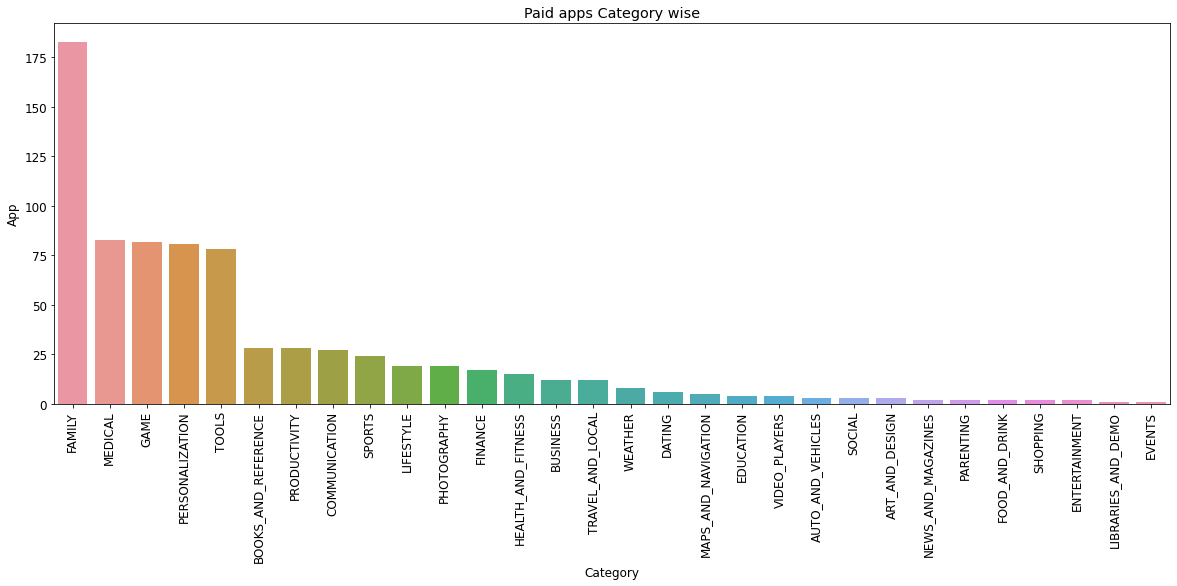

In [ ]:
#Showing categorywise paid Apps
plt.figure(figsize=(20,7))
plt.xticks(rotation=90,fontsize=12)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Paid apps Category wise')
sns.barplot(paid_apps_count.Category,paid_apps_count.App)
plt.show()

In [ ]:
#Category wise top 10 paid apps
count=list(paid_apps_count.loc[0:10,'App'])
lables=paid_apps_count.loc[0:10,'Category']

(-1.25, 1.25, -1.25, 1.25)

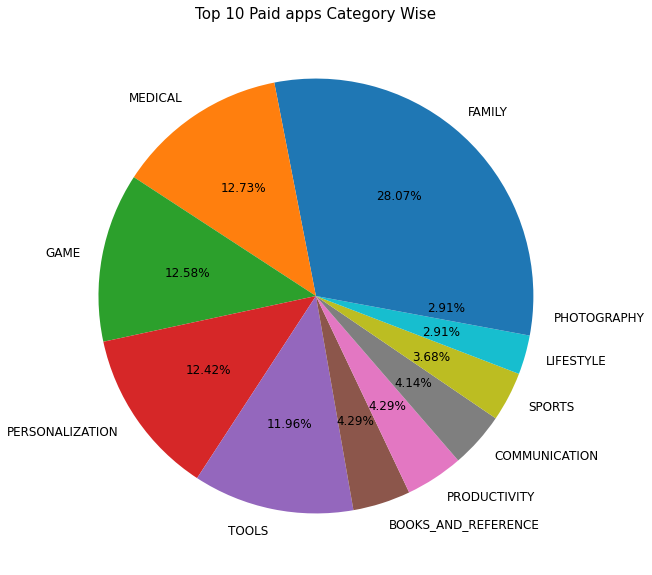

In [ ]:
# Via Pie chart showing top 10 paid apps 
lables=paid_apps_count.loc[0:10,'Category'] 
count=list(paid_apps_count.loc[0:10,'App'])
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(count,labels=lables ,autopct="%.2f%%")
plt.title('Top 10 Paid apps Category Wise', fontsize=15)
plt.axis('off')

In [ ]:
#Finding all unique values of Content Rating column
playstoredf['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [ ]:
genres = playstoredf.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})
installs=playstoredf.groupby(['Genres'])[['Installs']].sum()


In [ ]:
genres_install=pd.merge(genres,installs,on='Genres')
top_genres_install=genres_install.head(30)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


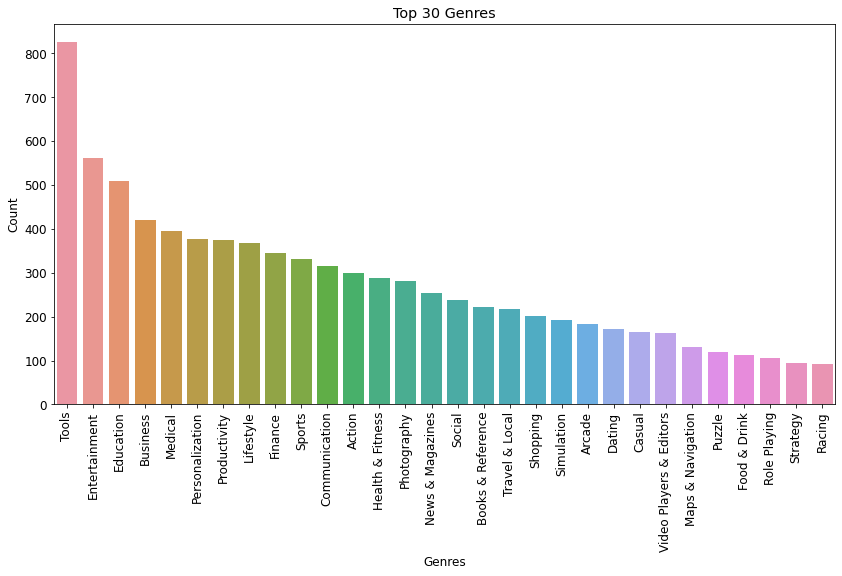

In [ ]:
# top 30 max number of apps present under different genres in playstore
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Number of application")
plt.title("Top 30 Genres")
sns.barplot(top_genres_install.Genres, top_genres_install.Count)
plt.show()


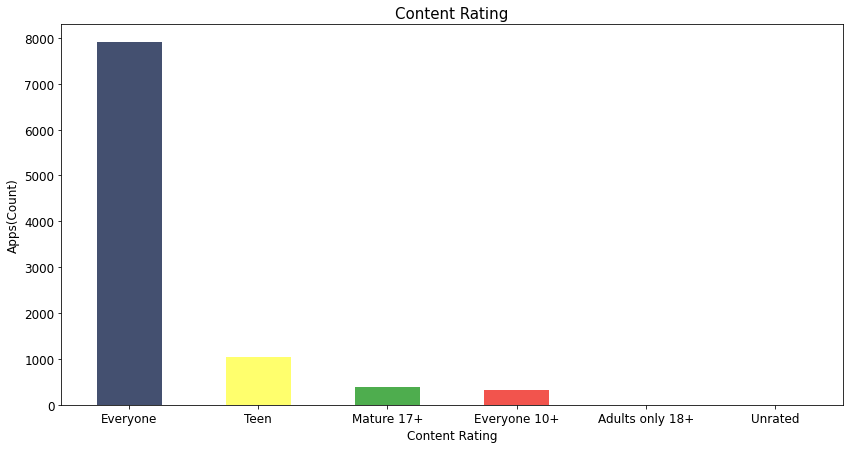

In [ ]:
# showing total number of apps grouped by Content Rating 
x2 = playstoredf['Content Rating'].value_counts().index
y2 = playstoredf['Content Rating'].value_counts()

x2sis = []
y2sis = []
for i in range(len(x2)):
    x2sis.append(x2[i])
    y2sis.append(y2[i])
plt.figure(figsize=(14,7))
plt.bar(x2sis,y2sis,width=0.5,color=['#15244c','#FFFF48','#2927','#EF2920','#CD202D','#ECC5F2'], alpha=0.8);
plt.title('Content Rating',size = 15);
plt.ylabel('Apps(Count)');
plt.xlabel('Content Rating');

In [ ]:
playstoredf.loc[playstoredf['Rating'].isnull(),'Rating']=playstoredf['Rating'].median()
playstoredf['Rating'].round(1)

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10835    4.2
10836    4.5
10837    5.0
10838    4.2
10839    4.5
Name: Rating, Length: 9658, dtype: float64

In [ ]:
playstoredf.loc[:,['App','Category',	'Rating'	,'Reviews'	,'Installs']]

,App,Category,Rating,Reviews,Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,10000
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,100000
...,...,...,...,...,...
10835,FR Forms,BUSINESS,4.173243,0,10
10836,Sya9a Maroc - FR,FAMILY,4.500000,38,5000
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,100
10838,Parkinson Exercices FR,MEDICAL,4.173243,3,1000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


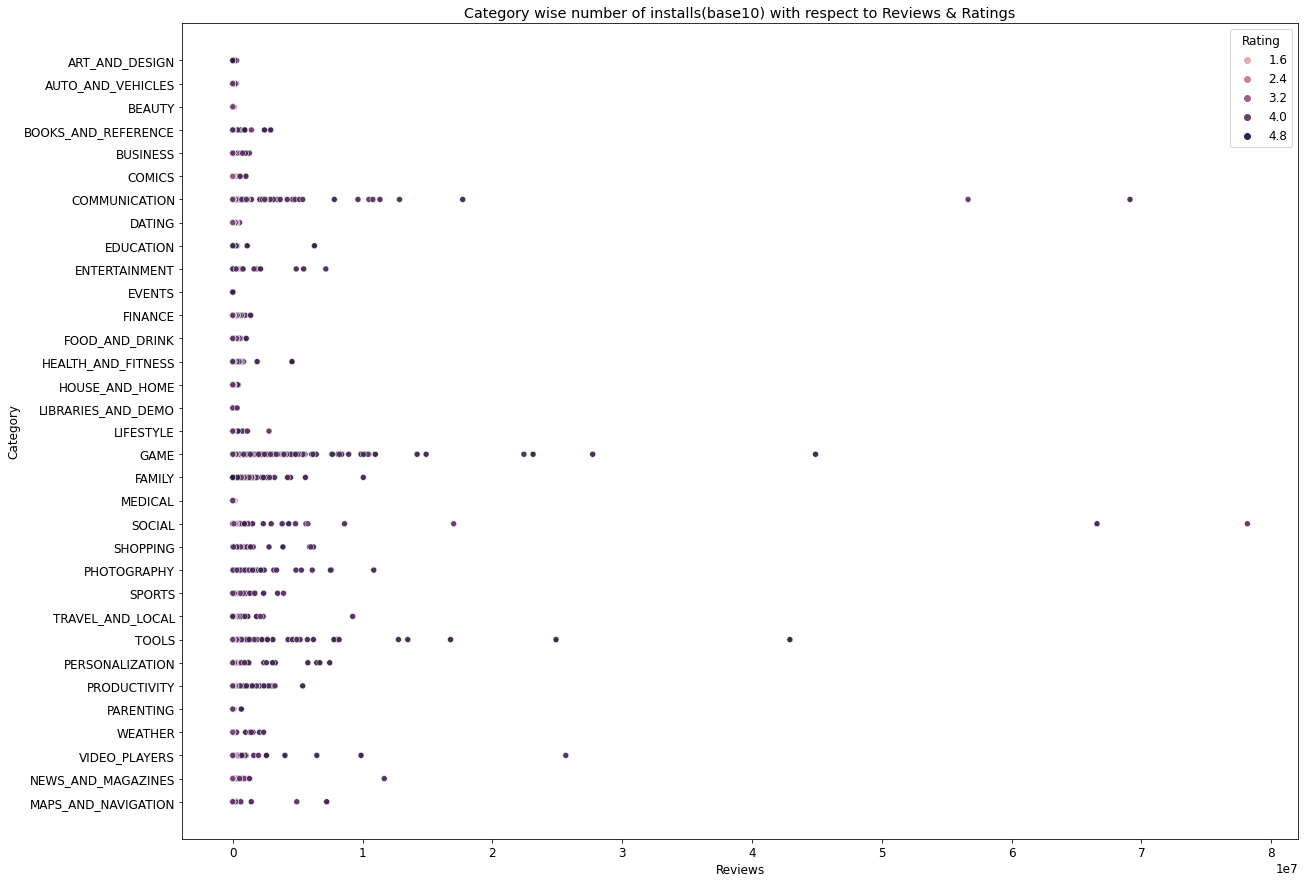

In [ ]:
plt.figure(figsize=(20,15))
plt.title("Category wise number of installs(base10) with respect to Reviews & Ratings")
sns.scatterplot(playstoredf['Reviews'],playstoredf['Category'],playstoredf['Rating'],hue=playstoredf['Installs'])
plt.show()

In [ ]:
popular_apps= playstoredf[(playstoredf['Rating']>4)&(playstoredf['Reviews']>1000)]
popular_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000.0,1000000,Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000.0,1000000,Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
10,Text on Photo - Fonteee,ART_AND_DESIGN,4.4,13880,28000.0,1000000,Free,0,Everyone,Art & Design,"October 27, 2017",1.0.4,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10799,Fr Daoud Lamei,SOCIAL,4.7,2036,6.8,100000,Free,0,Everyone,Social,"May 20, 2018",1.72,4.0.3 and up
10803,Fatal Raid - No.1 Mobile FPS,GAME,4.3,56496,81000.0,1000000,Free,0,Teen,Action,"August 7, 2018",1.5.447,4.0 and up
10804,Poker Pro.Fr,GAME,4.2,5442,17000.0,100000,Free,0,Teen,Card,"May 22, 2018",4.1.3,2.3 and up
10809,Castle Clash: RPG War and Strategy FR,FAMILY,4.7,376223,24000.0,1000000,Free,0,Everyone,Strategy,"July 18, 2018",1.4.2,4.1 and up


In [ ]:
a= popular_apps.groupby('Category')['App'].count()
a

Category
ART_AND_DESIGN          24
AUTO_AND_VEHICLES       24
BEAUTY                  13
BOOKS_AND_REFERENCE     76
BUSINESS                77
COMICS                  23
COMMUNICATION          129
DATING                  40
EDUCATION               90
ENTERTAINMENT           66
EVENTS                  12
FAMILY                 623
FINANCE                118
FOOD_AND_DRINK          54
GAME                   598
HEALTH_AND_FITNESS     147
HOUSE_AND_HOME          30
LIBRARIES_AND_DEMO      16
LIFESTYLE               83
MAPS_AND_NAVIGATION     56
MEDICAL                 55
NEWS_AND_MAGAZINES      78
PARENTING               18
PERSONALIZATION        139
PHOTOGRAPHY            155
PRODUCTIVITY           158
SHOPPING               114
SOCIAL                 111
SPORTS                 132
TOOLS                  282
TRAVEL_AND_LOCAL        82
VIDEO_PLAYERS           73
WEATHER                 51
Name: App, dtype: int64

Text(0.5, 1.0, ' Category Wise Most Popular Apps')

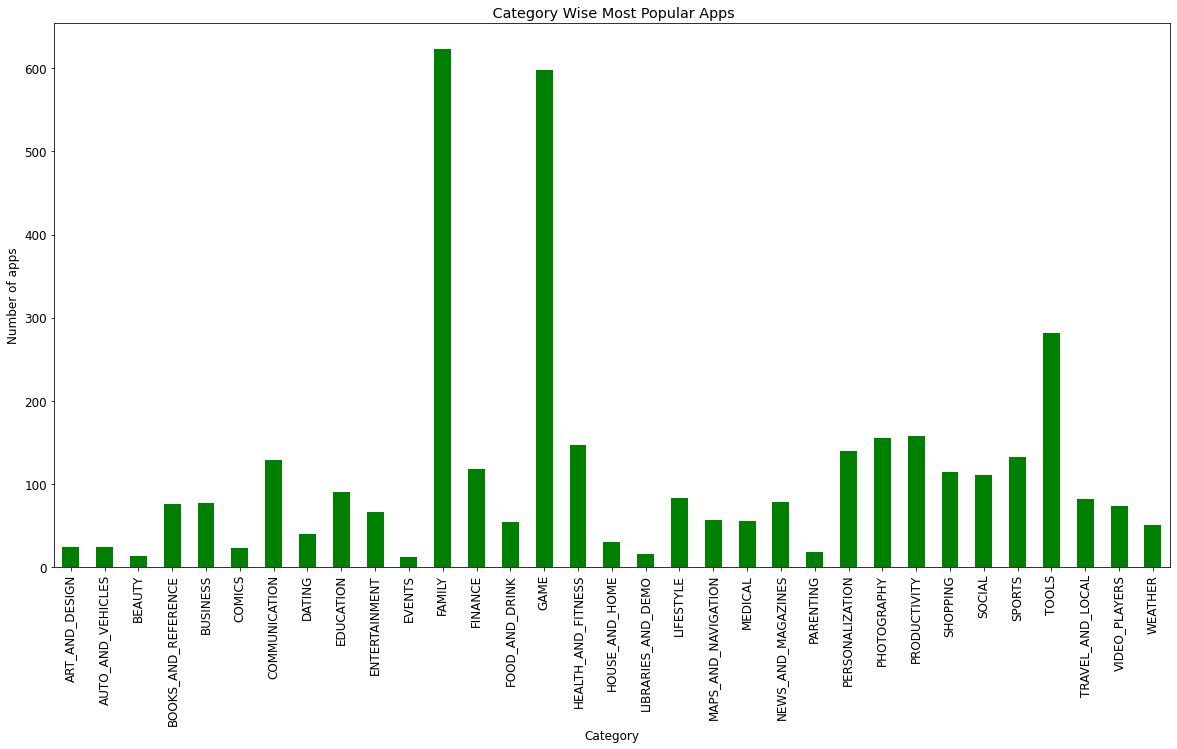

In [ ]:
# finding category wise most popular apps
plt.rcParams['figure.figsize']=(20,10)
a.plot(kind='bar', color = 'green')
plt.xlabel('Category',fontsize=12)
plt.ylabel('Number of apps')
plt.title(' Category Wise Most Popular Apps')

'''

•	Final Findings :   
	1)  While considering overall data set for paid as well as Free Apps , the top 3 Maximum number of Installs were from Communication , followed by Social and then Video Players category ,
2)  If considering Only Paid apps then Games , tools were the categories most installed ,

3)  Top 3 Most installed apps had size well below 12 Mbs.

•	Final Recommendations :  

•	1) If the app development needs to be done in Free app category , then it is recommended to be done in Top 3 , Communication , social or Video Players categories .

•	2) If they are looking for a paid app , then the best choice goes with Gaming followed by tools categories of apps,

•	3)The Size of the app development should be targeted to be well below 14 MBs as far as possible .



'''